# Simulation of stochastic process

We here try to compute several trajectories for a processus defined by :

$$ \mathrm{d}S_t = \mu(t, S_t)\mathrm{d}t + \sigma(t, S_t)\mathrm{d}W_t$$

Where $\mu : [0, +\infty[ \times \mathbb{R} \rightarrow \mathbb{R}$ and $\sigma : [0, +\infty[ \times \mathbb{R} \rightarrow \mathbb{R}$ are two functions defined by user. $(W_t)_{t \geqslant 0}$ a brownian motion.We need to fix $S_0$ the initial time and $T$ the maturity, because we are going to compute trajectories for the interval $[0, T]$.

Our goal, beyond the simulation of the stochastic process $(S_t)_{t\in\mathbb{R}}$, is to estimate the quantity :

$$\mathbb{E}\left[(S_T - K)^+\right]$$

With $K\in\mathbb{R}_+$ a strike if we consider a financial application.

We first define very simple functions for $\mu$ and $\sigma$ :

In [1]:
mu(t, x) = 0.01 * x
sigma(t, x) = 0.1 * x    

sigma (generic function with 1 method)

We now define the function which will return the trajectories

In [2]:
function trajectories(N_simulations, n_per_simulation, initial_value, T)
    t = LinRange(0, T, n_per_simulation)
    step = T / n_per_simulation
    
    S = initial_value * ones(n_per_simulation, N_simulations)
    
    for j in 1:N_simulations
        for i in 2:n_per_simulation
            S[i, j] = S[i-1, j] + mu(t[i], S[i-1, j]) * step + sigma(t[i], S[i-1, j]) * sqrt(step) * randn()
        end
    end
    
    return t, S
end

trajectories (generic function with 1 method)

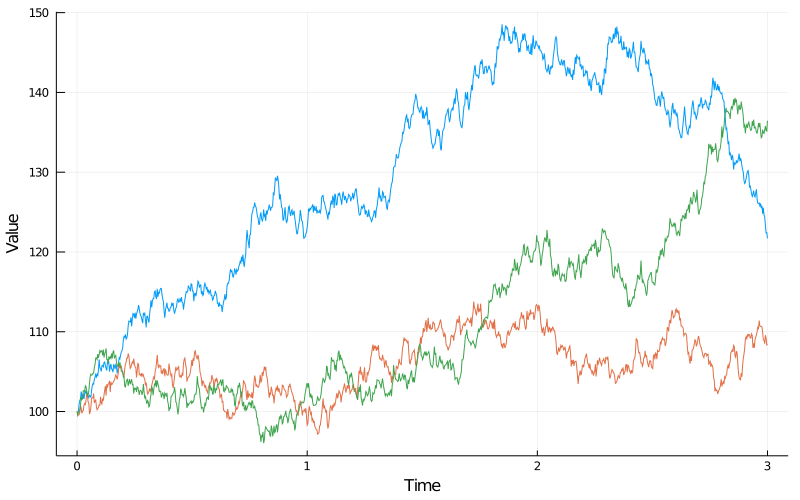

In [3]:
using Plots
N_simulations=3; n_per_simulation=1000; initial_value=100; T=3

t, S = trajectories(N_simulations, n_per_simulation, initial_value, T)

plot(t, S, legend=false, xlabel="Time", ylabel="Value", size=(800, 500))

Now we want to estimate the value of : 

$$\mathbb{E}\left[(S_T - K)^+\right]$$

And we will take $K=110$

Let's have a look with 5 trajectories :

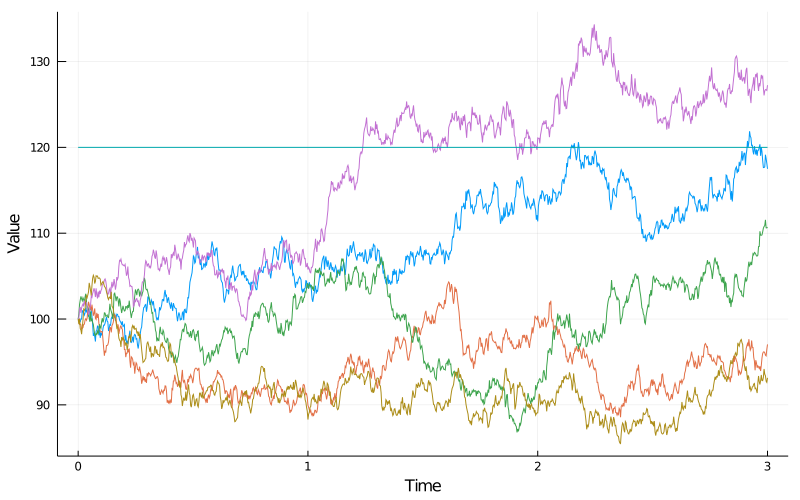

In [4]:
t, S = trajectories(5, n_per_simulation, initial_value, T)
plot(t, S, legend=false, xlabel="Time", ylabel="Value", size=(800, 500))
plot!([0, 3], [120, 120])

Let's evaluate with Monte-Carlo method the expectation.

In [5]:
using Printf

mean(vector) = sum(vector) / length(vector)

function evaluate(N_simulations, n_per_simulation, initial_value, T, K)
    t, S = trajectories(N_simulations, n_per_simulation, initial_value, T)
    
    final_values = S[n_per_simulation, :]
    expected = mean([max(x - 120, 0) for x in final_values])
    probability = mean([ifelse(x >= K, 1, 0) for x in final_values])
    
    @printf("Information for strike K=%0.0f, with %0.0f simulations we have : \n", K, N_simulations)
    @printf("Expected : %0.4f and use probability : %0.4f.\n", expected, probability)
end

evaluate (generic function with 1 method)

In [6]:
evaluate(1000, 1000, 100, 3, 120)

Information for strike K=120, with 1000 simulations we have : 
Expected : 2.1827 and use probability : 0.1740.


And if we want to know how long it would take to calculate 10 000 trajectories :

In [7]:
@time t, S = trajectories(10000, 1000, 100, 3)

  0.250448 seconds (5 allocations: 152.588 MiB, 5.19% gc time)


(range(0.0, stop=3.0, length=1000), [100.0 100.0 … 100.0 100.0; 100.64230595880186 100.39126158359215 … 100.36695463432812 99.58195591435997; … ; 122.58644228722686 98.63992936863927 … 92.20844034869765 75.87614051638892; 123.43746491772154 97.2703567828958 … 90.8648328587916 76.40783648278074])